In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb

In [4]:
df=pd.read_csv('G1.csv')
df_test=pd.read_csv('G2.csv')

In [5]:
df.head()

,TimeStamp,AssetGroup,Identifier,F2,F3,F4,F5,q,F7,F8,...,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33
0,1998-12-31,G1,86a1f1ee,bc068363,Capital Goods,Diversified Capital Goods,1,1,B1,14.0,...,0,1,7.0,0.0,1,4.0,0.0,1,0,-100
1,1998-12-31,G1,de5b9bca,e5fb34b9,Telecommunications,Telecom - Wireline Integrated & Services,6,1,BB2,12.0,...,-4,-4,NaN,NaN,-4,NaN,NaN,-4,-4,-4
2,1998-12-31,G1,2a0a4ee3,62835655,Basic Industry,Chemicals,1,1,B1,14.0,...,-4,-4,NaN,NaN,-4,NaN,NaN,-4,-4,-4
3,1998-12-31,G1,a67fb965,81f811c5,Transportation,Rail,2,0,B2,15.0,...,-4,-4,NaN,NaN,-4,NaN,NaN,-4,-4,-4
4,1998-12-31,G1,52f697cc,2becce58,Basic Industry,Building Materials,4,0,BB2,12.0,...,1,1,7.0,0.0,1,4.0,0.0,1,1,-99


In [6]:
df_test.head()

,TimeStamp,AssetGroup,Identifier,F2,F3,F4,F5,q,F7,F8,...,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33
0,1997-12-31,G2,2050c8b3,134e3828,Telecommunications,Telecom - Integrated/Services,2,0,B2,15.0,...,-3,0,3.0,7.0,0,0.0,6.0,0,-3,-3
1,1997-12-31,G2,69bd765f,134e3828,Telecommunications,Telecom - Integrated/Services,2,1,B2,15.0,...,-3,0,3.0,7.0,0,0.0,6.0,0,-3,-3
2,1997-12-31,G2,87093289,5b42c631,Services,Building & Construction,2,0,B1,14.0,...,-3,0,3.0,7.0,0,0.0,6.0,0,-3,-3
3,1997-12-31,G2,4ce55a61,45ef6ce3,Media,Media - Broadcast,1,1,B2,15.0,...,-1,1,4.0,0.0,0,0.0,0.0,0,-1,-1
4,1997-12-31,G2,0aa1ccf8,5b42c631,Services,Building & Construction,2,1,B1,14.0,...,-3,0,3.0,7.0,0,0.0,6.0,0,-3,-3


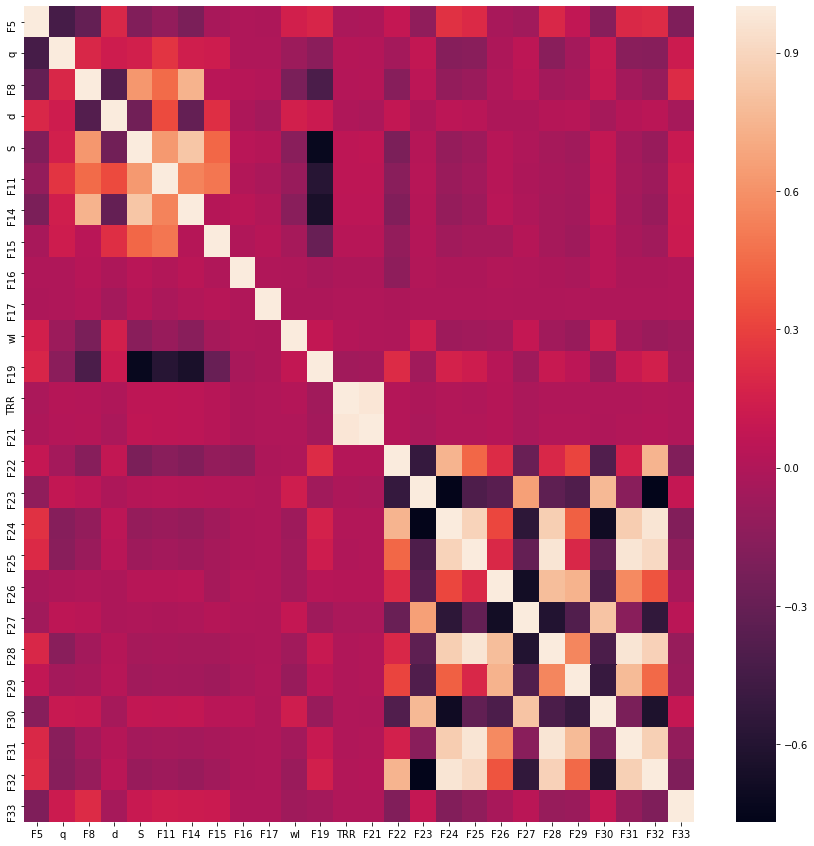

In [12]:
plt.subplots(figsize=(15,15 ))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)
plt.show()

In [13]:
correlation_matrix['TRR'].sort_values(ascending = False)

TRR    1.000000
F21    0.976311
S      0.060496
F11    0.059398
F14    0.050005
F15    0.027253
F26    0.023759
q      0.020033
F22    0.017913
F8     0.017284
wI     0.015083
F32    0.008805
F24    0.006245
F17    0.003687
F29    0.003516
F28    0.003441
F31    0.002817
F25    0.002541
F30    0.000393
F33   -0.000862
d     -0.006628
F16   -0.011144
F23   -0.011933
F5    -0.015971
F27   -0.019085
F19   -0.058083
Name: TRR, dtype: float64

In [15]:
# Retaining Top 4 features
numerical_df = df[['F21','S','F11','F14', 'TRR']]
numerical_df_test = df_test[['F21','S','F11','F14', 'TRR']]
numerical_df.describe()

,F21,S,F11,F14,TRR
count,100483.000000,100483.000000,100483.000000,100483.000000,100483.000000
mean,0.258733,472.465064,1714.639863,436.339858,0.496910
std,5.371406,528.222779,1401.960279,401.651737,5.342896
min,-98.008000,-1980.000000,-6514.200000,-47.000000,-98.000000
25%,-0.517000,178.000000,632.940000,187.000000,-0.357000
50%,0.281000,325.000000,1390.146000,318.000000,0.542000
75%,1.328000,576.000000,2439.505000,569.500000,1.606000
max,166.665000,9180.000000,32101.083000,8511.000000,166.667000


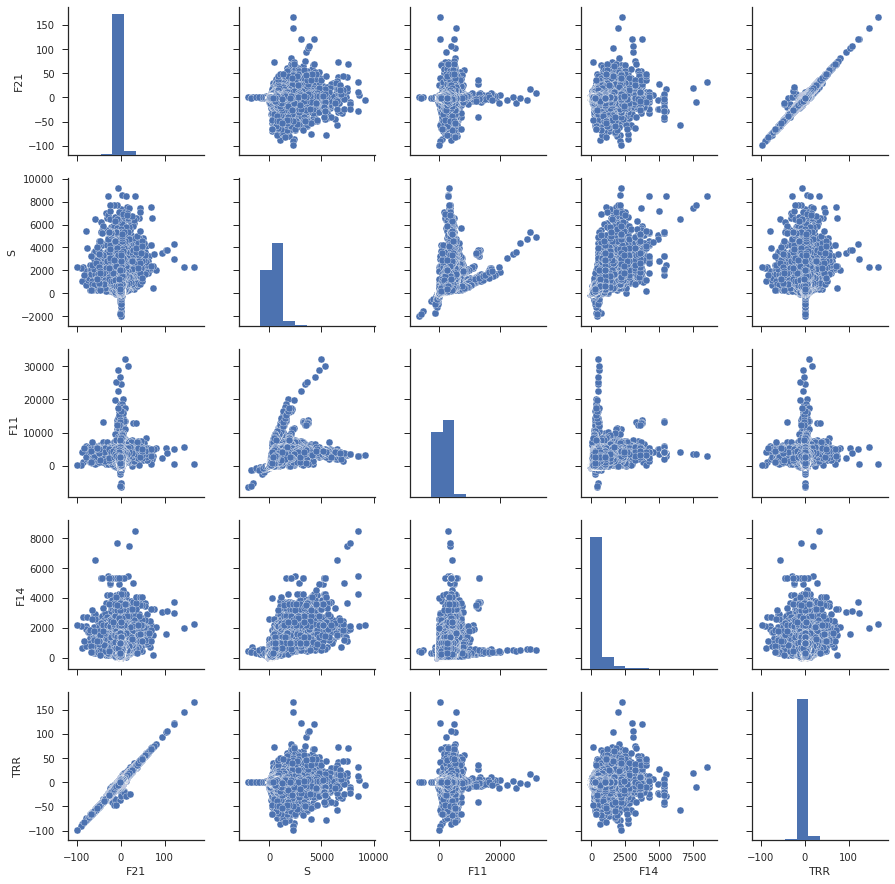

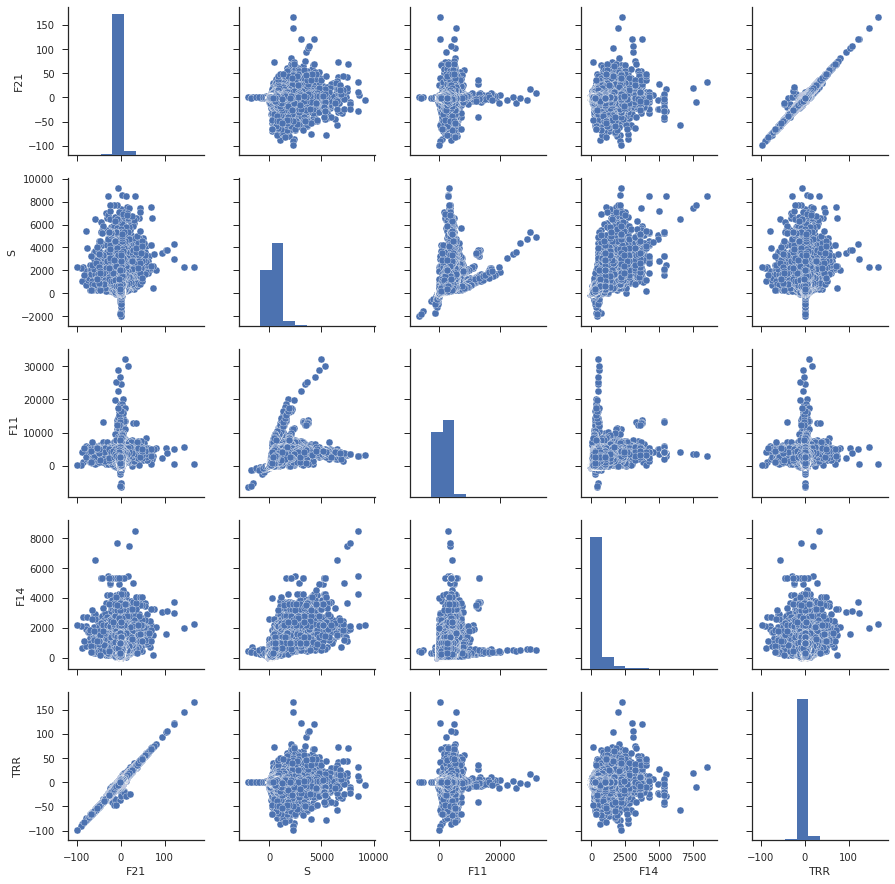

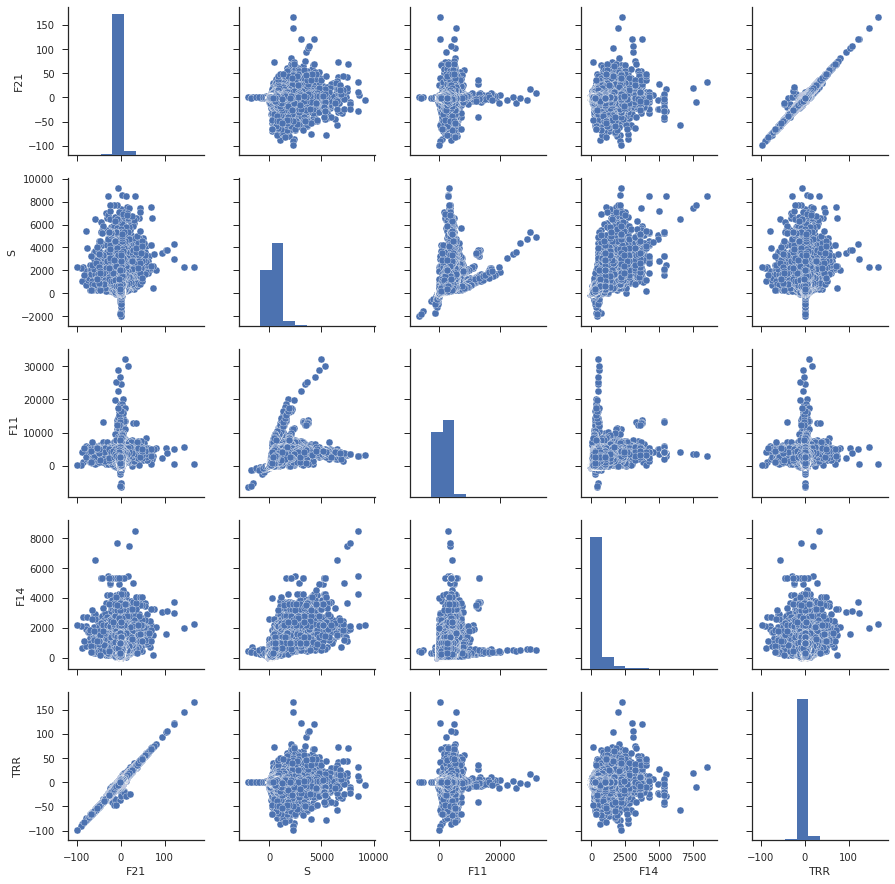

In [18]:
# PairPlot between F21 and TRR (highly correlated)

sns.set(style="ticks")
sns.pairplot(numerical_df)
plt.show()

In [19]:
numerical_df = numerical_df[(np.abs(stats.zscore(numerical_df)) < 3).all(axis=1)]
numerical_df_test = numerical_df_test.dropna()
numerical_df_test = numerical_df_test[(np.abs(stats.zscore(numerical_df_test)) < 3).all(axis=1)]

In [20]:
# Separating out the target
y = numerical_df.loc[:,['TRR']].values
y_new= numerical_df_test.loc[:,['TRR']].values

# Separating out the Input
x = numerical_df.drop(['TRR'], axis=1).values
x_new=numerical_df_test.drop(['TRR'],axis=1).values

In [21]:
x = StandardScaler().fit_transform(x)
x_new = StandardScaler().fit_transform(x_new)